## HYPERION 2021

# Q5

First we read vel_data.csv using pandas and then plot the data using matplotlib.

Index(['Time (years)', ' Observed Velocity (cm/s)'], dtype='object')


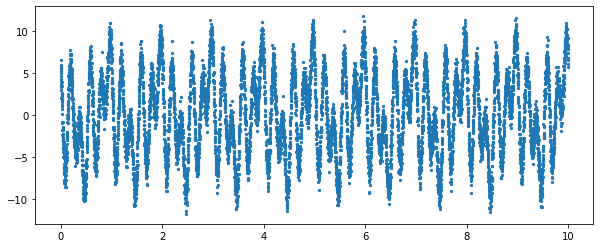

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf
df=pd.read_csv("vel_data.csv")
print(df.columns)
time=df['Time (years)']
vel=df[' Observed Velocity (cm/s)']
plt.figure(figsize=(10,4))
plt.scatter(time ,vel ,s=5)

Now we perform fourier transform on the velocity data to get the frequency of periodic signal(s) 

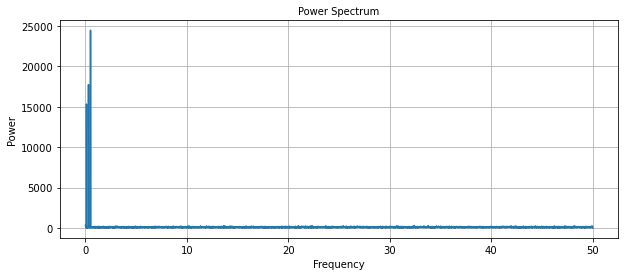

In [2]:
power=np.fft.rfft(vel)
freq=np.fft.rfftfreq(len(vel),0.01)
plt.figure(figsize=(10,4))
plt.plot(freq,np.abs(power))
plt.xlabel("Frequency",size=10)
plt.ylabel("Power",size=10)
plt.title("Power Spectrum",size=10)
plt.grid()
plt.show()

In [3]:
indices=np.where(np.abs(power)>500) 
print(freq[indices])
print(np.abs((power[indices])))

[0.1 0.3 0.5]
[15336.02128547 17740.38325716 24469.71157366]


Using fourier transform we find that the frequency of periodic signals is 0.1,0.3 and 0.5. Now lets perform an inverse fourier transform to get the periodic part of the velocity, filtering the noise.

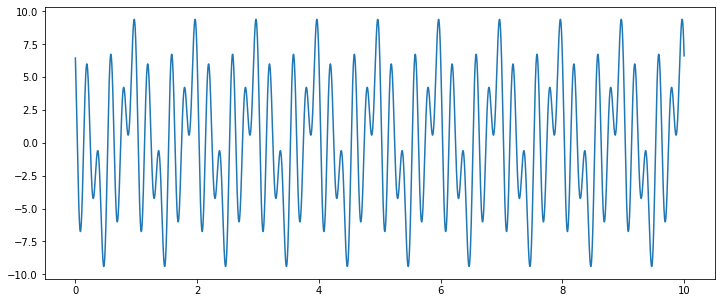

In [4]:
indices=np.where(np.abs(power)<500)
power[indices]=0
inverse=np.fft.irfft(power)
plt.figure(figsize=(12,5))
plt.plot(time,inverse)
plt.show()

Now we define a function which has two parts -1)linear with time and 2)the calculated periodic part. Using scipy and curve fit, we calculate the best fit curve and the radial acceleration.

[0.0082892] [[2.96361458e-06]]


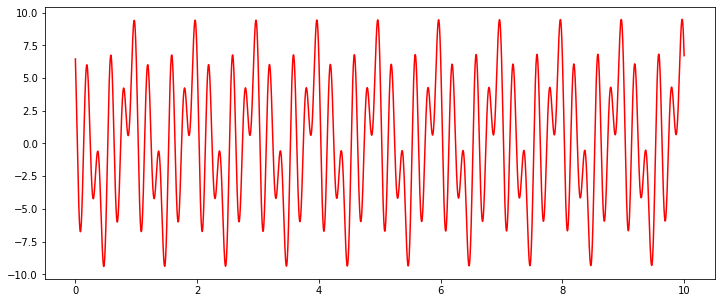

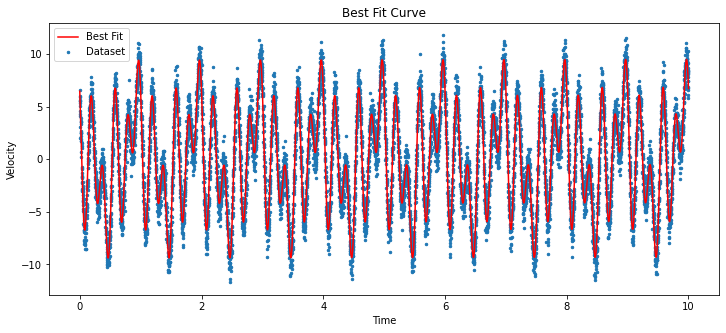

In [5]:
def f(t,m):
    return m*t+inverse
p_opt, p_cov = cf(f,time,vel)
print(p_opt,p_cov)
plt.figure(figsize=(12,5))
plt.plot(time,f(time,*p_opt),'r',label='Best Fit')
plt.show()
plt.figure(figsize=(12,5))
plt.plot(time,f(time,*p_opt),'r',label='Best Fit')
plt.scatter(time,vel,s=6, label='Dataset')
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title('Best Fit Curve')
plt.legend()
plt.show()

As we can see the curve fits very nicely on the given data abd the covariance is small( order of 10^-6) so we can say that velocity as linear function of time is a good estimate. From curve fit, the value of acceleration is found out to be 0.0082892 cm/s^2

# Q6
First we read the data using pandas and try to find the unique velocities of the stars.

In [6]:
df=pd.read_csv("acc_data.csv")
print(df.head())
print(df.columns)
print(df['acc'].unique)

   Star number        acc
0             0  2.567932
1             1  2.345989
2             2  0.015347
3             3  0.646854
4             4  1.932717
Index(['Star number ', 'acc'], dtype='object')
<bound method Series.unique of 0       2.567932
1       2.345989
2       0.015347
3       0.646854
4       1.932717
          ...   
1195    6.175684
1196    1.196303
1197   -8.301368
1198    8.903354
1199   -0.862692
Name: acc, Length: 1200, dtype: float64>


As we can see, no velocities are repeated, therefore, we cannot directly plot the data to get the probability distribution curve. To get an approximate curve we need to plot a histogram having a range of velocities on x axis.

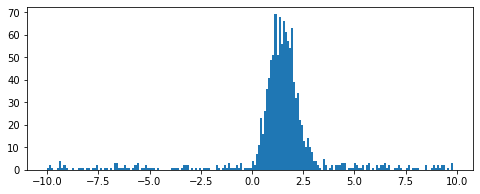

In [7]:
plt.figure(figsize=(8,3))
plt.hist(df['acc'], bins = 200,)
plt.show()

Now we define a gaussian function and again use curve fit to find mean acceleration.

[ 1.47532421 64.96383903  0.6274778 ]
Average acceleration= 1.4753242088727248


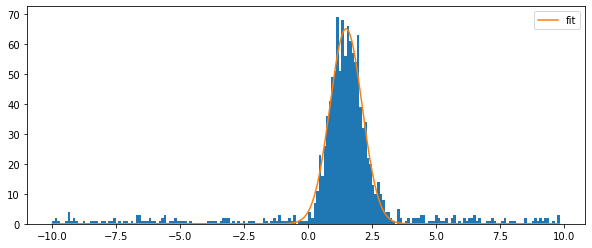

In [8]:
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))
plt.figure(figsize=(10,4))
bin_heights, bin_borders, _ = plt.hist(df['acc'], bins = 200)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = cf(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])
x_data = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_data, gaussian(x_data, *popt), label='fit')
plt.legend()
print(popt)
print("Average acceleration=",popt[0])

From curve fitting, we find the average acceleration is 1.475 cm s^-1 year^-1